Import Libraries:

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


Load and Preprocess the Image:

In [19]:
image = cv2.imread('/content/road.jpg')


Convert to Grayscale:


In [20]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

Apply Gaussian Blur:

In [21]:
blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)


Edge Detection:

In [22]:
edges = cv2.Canny(blurred_image, threshold1=50, threshold2=150)


Region of Interest (ROI) Selection:

In [23]:
height, width = edges.shape
roi_vertices = [
    (0, height),
    (width / 2, height / 2),
    (width, height)
]

mask = np.zeros_like(edges)
cv2.fillPoly(mask, np.array([roi_vertices], np.int32), 255)
masked_edges = cv2.bitwise_and(edges, mask)


Hough Transform for Line Detection:

In [24]:
lines = cv2.HoughLinesP(
    masked_edges,
    rho=6,
    theta=np.pi/60,
    threshold=160,
    lines=np.array([]),
    minLineLength=40,
    maxLineGap=25
)


Draw Detected Lines:

In [25]:
line_image = np.zeros_like(image)
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(line_image, (x1, y1), (x2, y2), (0, 0, 255), 5)


Overlay Detected Lanes on Original Image:

In [26]:
lane_image = cv2.addWeighted(image, 0.8, line_image, 1, 1)


Display the Result:

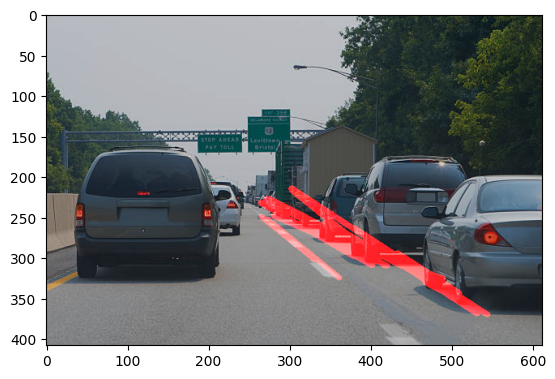

In [27]:
plt.imshow(cv2.cvtColor(lane_image, cv2.COLOR_BGR2RGB))
plt.show()
